In [20]:
import os
import sys

import numpy  as np
import tables as tb
import pandas as pd
import matplotlib
import math

#the line below makes the plot as a pop-up, that can be saved
#matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as clrs

import matplotlib.cm as cm
from matplotlib.colors import Normalize

from IC.invisible_cities.evm.event_model        import Cluster, Hit
from IC.invisible_cities.types.ic_types         import xy
from IC.invisible_cities.reco.paolina_functions import voxelize_hits

from IC.invisible_cities.core.exceptions import NoHits

In [21]:
import functions.histo_functions as myhf
import functions.efficiency_functions as myef
import functions.recovstrue as myrvt

In [22]:
filepath = '/Users/halmamol/NEXT/files/NEXT100/'
event = '0nubb'

In [23]:
filename_FS = filepath+f'esmeraldaFS/{event}/next100.{event}.1.cdst.h5'
h5file = tb.open_file(filename_FS)
h5file

File(filename=/Users/halmamol/NEXT/files/NEXT100/esmeraldaFS/0nubb/next100.0nubb.1.cdst.h5, title='', mode='r', root_uep='/', filters=Filters(complevel=4, complib='zlib', shuffle=True, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/CHITS (Group) ''
/CHITS/highTh (Table(6383,), shuffle, zlib(4)) 'Hits'
  description := {
  "event": Int32Col(shape=(), dflt=0, pos=0),
  "time": Float64Col(shape=(), dflt=0.0, pos=1),
  "npeak": UInt16Col(shape=(), dflt=0, pos=2),
  "Xpeak": Float64Col(shape=(), dflt=0.0, pos=3),
  "Ypeak": Float64Col(shape=(), dflt=0.0, pos=4),
  "nsipm": UInt16Col(shape=(), dflt=0, pos=5),
  "X": Float64Col(shape=(), dflt=0.0, pos=6),
  "Y": Float64Col(shape=(), dflt=0.0, pos=7),
  "Xrms": Float64Col(shape=(), dflt=0.0, pos=8),
  "Yrms": Float64Col(shape=(), dflt=0.0, pos=9),
  "Z": Float64Col(shape=(), dflt=0.0, pos=10),
  "Q": Float64Col(shape=(), dflt=0.0, pos=11),
  "E": Float64Col(shape=(), dflt=0.0, pos=12),
  "Qc": Float64Col(s

## Fullsim Files

In [9]:
#FULLSIM files
events_list = []

#loop over all the files, to read 'Tracks' information
for nfile in range(1,1000):
    
    filename_FS = filepath+f'esmeraldaFS/{event}/next100.{event}.{nfile}.cdst.h5'
    try:
        readfile = pd.read_hdf(filename_FS, 'Summary/Events')
    except:
        print('File {} not good'.format(filename_0nubb))
        continue
        
    events_list.append(readfile)


events_list_FS = pd.concat([dt for dt in events_list]) 
events_list_FS.columns  

Index(['event', 'evt_energy', 'evt_charge', 'evt_ntrks', 'evt_nhits',
       'evt_x_avg', 'evt_y_avg', 'evt_z_avg', 'evt_r_avg', 'evt_x_min',
       'evt_y_min', 'evt_z_min', 'evt_r_min', 'evt_x_max', 'evt_y_max',
       'evt_z_max', 'evt_r_max', 'evt_out_of_map'],
      dtype='object')

In [11]:
events_list_FS

,event,evt_energy,evt_charge,evt_ntrks,evt_nhits,evt_x_avg,evt_y_avg,evt_z_avg,evt_r_avg,evt_x_min,evt_y_min,evt_z_min,evt_r_min,evt_x_max,evt_y_max,evt_z_max,evt_r_max,evt_out_of_map
0,0,2.465933,-1.0,1,695,-204.288736,-288.359901,326.182729,355.580413,-287.62,-396.47,310.205250,264.043510,-147.67,-178.77,347.664875,456.073061,False
1,1,NaN,-1.0,1,393,NaN,NaN,NaN,NaN,396.58,-209.87,85.224500,418.008841,489.88,-85.47,122.420531,527.012976,True
2,2,2.446440,-1.0,1,686,140.856144,-118.963166,812.083375,185.911886,70.03,-178.77,784.210875,120.950640,209.98,-69.92,839.749625,256.706115,False
3,3,1.798077,-1.0,1,504,247.844719,201.955194,944.058574,320.361390,178.88,147.78,924.246000,242.228700,303.28,256.63,963.853500,377.945154,False
4,4,2.488484,-1.0,1,701,-426.703763,-41.199887,686.946937,429.181502,-489.77,-101.02,641.252813,367.426495,-365.37,7.83,724.816063,491.306061,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,9985,1.916027,-1.0,1,448,282.419576,-79.333084,224.021347,294.289869,209.98,-163.22,216.199781,216.904812,365.48,-7.72,235.829594,383.619858,False
6,9986,2.463974,-1.0,1,646,264.313565,49.098043,1064.141605,269.809599,178.88,-23.27,1044.154750,180.401438,334.38,116.68,1081.748500,338.789101,False
7,9987,2.452690,-1.0,1,690,-45.452311,142.773358,350.702131,153.607612,-116.57,70.03,331.091500,80.069928,38.93,209.98,368.696062,213.538270,False
8,9988,2.073608,-1.0,1,562,-58.546737,-238.101586,821.981078,246.045360,-116.57,-303.17,800.147063,182.936342,7.83,-178.77,841.833625,314.987571,False


In [24]:
filename_FS = filepath+f'beershebaFS/{event}/hits/next100.{event}.1.deconv.h5'
h5file = tb.open_file(filename_FS)
h5file

File(filename=/Users/halmamol/NEXT/files/NEXT100/beershebaFS/0nubb/hits/next100.0nubb.1.deconv.h5, title='', mode='r', root_uep='/', filters=Filters(complevel=4, complib='zlib', shuffle=True, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/DECO (Group) ''
/DECO/Events (Table(254988,), shuffle, zlib(4)) 'Deconvolved hits'
  description := {
  "event": Int64Col(shape=(), dflt=0, pos=0),
  "npeak": UInt64Col(shape=(), dflt=0, pos=1),
  "X": Float64Col(shape=(), dflt=0.0, pos=2),
  "Y": Float64Col(shape=(), dflt=0.0, pos=3),
  "Z": Float64Col(shape=(), dflt=0.0, pos=4),
  "E": Float64Col(shape=(), dflt=0.0, pos=5)}
  byteorder := 'little'
  chunkshape := (1365,)
  autoindex := True
  colindexes := {
    "event": Index(6, medium, shuffle, zlib(1)).is_csi=False}
/MC (Group) ''
/MC/configuration (Table(41,), shuffle, zlib(4)) ''
  description := {
  "param_key": StringCol(itemsize=300, shape=(), dflt=b'', pos=0),
  "param_value": StringCol(itemsize=300, sh

In [30]:
filename_FS = filepath+f'beershebaFS/{event}/tracks/21mm/next100.{event}.1.skel_tracks.R21mm.h5'
h5file = tb.open_file(filename_FS)
h5file

File(filename=/Users/halmamol/NEXT/files/NEXT100/beershebaFS/0nubb/tracks/21mm/next100.0nubb.1.skel_tracks.R21mm.h5, title='', mode='r', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/Tracks (Group) ''
/Tracks/axis0 (Array(35,)) ''
  atom := StringAtom(itemsize=16, shape=(), dflt=b'')
  maindim := 0
  flavor := 'numpy'
  byteorder := 'irrelevant'
  chunkshape := None
/Tracks/axis1 (Array(30,)) ''
  atom := Int64Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/Tracks/block0_items (Array(29,)) ''
  atom := StringAtom(itemsize=10, shape=(), dflt=b'')
  maindim := 0
  flavor := 'numpy'
  byteorder := 'irrelevant'
  chunkshape := None
/Tracks/block0_values (Array(30, 29)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/Tracks/block1_items (Array(6,)) ''
  atom := St

In [14]:
#FULLSIM files
events_list_b = []

#loop over all the files, to read 'Tracks' information
for nfile in range(1,1000):
    
    filename_FS_b = filepath+f'beershebaFS/{event}/hits/next100.{event}.{nfile}.deconv.h5'
    try:
        readfile = pd.read_hdf(filename_FS_b, 'Summary/Events')
    except:
        print('File {} not good'.format(filename_FS_b))
        continue
        
    events_list_b.append(readfile)


events_list_FS_b = pd.concat([dt for dt in events_list_b]) 
events_list_FS_b.columns  

File /Users/halmamol/NEXT/files/NEXT100/beershebaFS/0nubb/hits/next100.0nubb.723.deconv.h5 not good
File /Users/halmamol/NEXT/files/NEXT100/beershebaFS/0nubb/hits/next100.0nubb.724.deconv.h5 not good
File /Users/halmamol/NEXT/files/NEXT100/beershebaFS/0nubb/hits/next100.0nubb.754.deconv.h5 not good
File /Users/halmamol/NEXT/files/NEXT100/beershebaFS/0nubb/hits/next100.0nubb.764.deconv.h5 not good
File /Users/halmamol/NEXT/files/NEXT100/beershebaFS/0nubb/hits/next100.0nubb.774.deconv.h5 not good
File /Users/halmamol/NEXT/files/NEXT100/beershebaFS/0nubb/hits/next100.0nubb.794.deconv.h5 not good


Index(['event', 'evt_energy', 'evt_charge', 'evt_ntrks', 'evt_nhits',
       'evt_x_avg', 'evt_y_avg', 'evt_z_avg', 'evt_r_avg', 'evt_x_min',
       'evt_y_min', 'evt_z_min', 'evt_r_min', 'evt_x_max', 'evt_y_max',
       'evt_z_max', 'evt_r_max', 'evt_out_of_map'],
      dtype='object')

In [19]:
events_list_FS_b

,event,evt_energy,evt_charge,evt_ntrks,evt_nhits,evt_x_avg,evt_y_avg,evt_z_avg,evt_r_avg,evt_x_min,evt_y_min,evt_z_min,evt_r_min,evt_x_max,evt_y_max,evt_z_max,evt_r_max,evt_out_of_map
0,0,2.465933,-1.0,1,695,-204.288736,-288.359901,326.182729,355.580413,-287.62,-396.47,310.205250,264.043510,-147.67,-178.77,347.664875,456.073061,False
1,1,NaN,-1.0,1,393,NaN,NaN,NaN,NaN,396.58,-209.87,85.224500,418.008841,489.88,-85.47,122.420531,527.012976,True
2,2,2.446440,-1.0,1,686,140.856144,-118.963166,812.083375,185.911886,70.03,-178.77,784.210875,120.950640,209.98,-69.92,839.749625,256.706115,False
3,3,1.798077,-1.0,1,504,247.844719,201.955194,944.058574,320.361390,178.88,147.78,924.246000,242.228700,303.28,256.63,963.853500,377.945154,False
4,4,2.488484,-1.0,1,701,-426.703763,-41.199887,686.946937,429.181502,-489.77,-101.02,641.252813,367.426495,-365.37,7.83,724.816063,491.306061,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,9985,1.916027,-1.0,1,448,282.419576,-79.333084,224.021347,294.289869,209.98,-163.22,216.199781,216.904812,365.48,-7.72,235.829594,383.619858,False
6,9986,2.463974,-1.0,1,646,264.313565,49.098043,1064.141605,269.809599,178.88,-23.27,1044.154750,180.401438,334.38,116.68,1081.748500,338.789101,False
7,9987,2.452690,-1.0,1,690,-45.452311,142.773358,350.702131,153.607612,-116.57,70.03,331.091500,80.069928,38.93,209.98,368.696062,213.538270,False
8,9988,2.073608,-1.0,1,562,-58.546737,-238.101586,821.981078,246.045360,-116.57,-303.17,800.147063,182.936342,7.83,-178.77,841.833625,314.987571,False


## DETSIM files

/Users/halmamol/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/halmamol/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/halmamol/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/halmamol/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


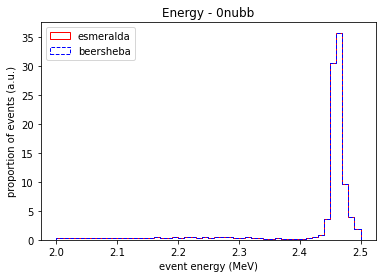

In [18]:
evt_energy_esme = events_list_FS.evt_energy
evt_energy_beers = events_list_FS_b.evt_energy

plt.hist(evt_energy_esme, bins = 50, range = (2, 2.5), density=True, color='red', histtype='step', label = 'esmeralda')
plt.hist(evt_energy_beers, bins = 50, range = (2, 2.5), density=True, color='blue', histtype='step', label = 'beersheba', linestyle='dashed')

plt.xlabel('event energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'Energy - {event}')
plt.legend(loc=2);
plt.show()